<a href="https://colab.research.google.com/github/lavanya-finloge/Country-of-origin-ml/blob/main/Final_Country_of_Origin.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Libraries

In [ ]:
pip install lazypredict

In [ ]:
import pandas as pd
import plotly.express as px
from scipy import stats
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning : Identifying algorithms/Model
from lazypredict.Supervised import LazyClassifier

# ML Classifiers
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Metrics
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
    classification_report
)

# Optional: data splitting if not already done
from sklearn.model_selection import train_test_split


# EDA (Exploratory Data Analysis)

In [ ]:
file_path = '/content/drive/MyDrive/ML3/Copy of risk_models_training_uae.xlsx'

# Load only the required sheet
df = pd.read_excel(file_path, sheet_name='4_Country_of_origin')

df.head()

,declaration_id,declaration_date,importer_id,exporter_id,hs_code,declared_value,currency,origin_country,transport_mode,route,container_count,packaging_type,inspection_history_count,previous_overall_risk_score,certificate_of_origin,country_risk_score,origin_verification_failures,origin_flag
0,DCL00001,2024-03-29,IMP357,EXP199,29211920,46561.43,CNY,DE,road,DEAE,5,box,3,0.34,NaN,0.06,NaN,0
1,DCL00002,2025-06-05,IMP134,EXP459,85171200,23743.07,USD,CN,road,SGAE,2,loose,0,0.51,NaN,0.57,NaN,0
2,DCL00003,2024-01-03,IMP446,EXP340,71131990,44993.75,SAR,SG,road,INAE,4,box,5,0.27,NaN,0.65,NaN,0
3,DCL00004,2025-04-11,IMP093,EXP092,10061001,33719.88,SAR,SG,sea,USAE,3,bag,3,0.44,NaN,0.90,NaN,0
4,DCL00005,2024-03-15,IMP399,EXP338,93049099,39873.53,EUR,CN,sea,INAE,4,loose,5,0.53,NaN,0.42,NaN,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   declaration_id                10000 non-null  object 
 1   declaration_date              10000 non-null  object 
 2   importer_id                   10000 non-null  object 
 3   exporter_id                   10000 non-null  object 
 4   hs_code                       10000 non-null  int64  
 5   declared_value                10000 non-null  float64
 6   currency                      10000 non-null  object 
 7   origin_country                10000 non-null  object 
 8   transport_mode                10000 non-null  object 
 9   route                         10000 non-null  object 
 10  container_count               10000 non-null  int64  
 11  packaging_type                10000 non-null  object 
 12  inspection_history_count      10000 non-null  int64  
 13  pr

In [ ]:
df.describe()

,hs_code,declared_value,container_count,inspection_history_count,previous_overall_risk_score,certificate_of_origin,country_risk_score,origin_verification_failures,origin_flag
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,0.0,10000.000000,0.0,10000.000000
mean,3.667884e+07,25219.387671,3.017100,2.484100,0.497543,NaN,0.500253,NaN,0.505800
std,3.451451e+07,14393.592117,1.417183,1.712904,0.290144,NaN,0.288003,NaN,0.499991
min,1.012100e+06,110.060000,1.000000,0.000000,0.000000,NaN,0.000000,NaN,0.000000
25%,1.006100e+07,12824.965000,2.000000,1.000000,0.240000,NaN,0.250000,NaN,0.000000
50%,2.921192e+07,25348.005000,3.000000,2.000000,0.500000,NaN,0.500000,NaN,1.000000
75%,7.113199e+07,37612.235000,4.000000,4.000000,0.750000,NaN,0.750000,NaN,1.000000
max,9.304910e+07,49983.090000,5.000000,5.000000,1.000000,NaN,1.000000,NaN,1.000000


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
hs_code,10000.0,3.667884e+07,3.451451e+07,1012100.00,1.006100e+07,2.921192e+07,7.113199e+07,93049099.00
declared_value,10000.0,2.521939e+04,1.439359e+04,110.06,1.282497e+04,2.534800e+04,3.761224e+04,49983.09
container_count,10000.0,3.017100e+00,1.417183e+00,1.00,2.000000e+00,3.000000e+00,4.000000e+00,5.00
inspection_history_count,10000.0,2.484100e+00,1.712904e+00,0.00,1.000000e+00,2.000000e+00,4.000000e+00,5.00
previous_overall_risk_score,10000.0,4.975430e-01,2.901439e-01,0.00,2.400000e-01,5.000000e-01,7.500000e-01,1.00
certificate_of_origin,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_risk_score,10000.0,5.002530e-01,2.880028e-01,0.00,2.500000e-01,5.000000e-01,7.500000e-01,1.00
origin_verification_failures,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_flag,10000.0,5.058000e-01,4.999914e-01,0.00,0.000000e+00,1.000000e+00,1.000000e+00,1.00


In [ ]:
df.head()

,declaration_id,declaration_date,importer_id,exporter_id,hs_code,declared_value,currency,origin_country,transport_mode,route,container_count,packaging_type,inspection_history_count,previous_overall_risk_score,certificate_of_origin,country_risk_score,origin_verification_failures,origin_flag
0,DCL00001,2024-03-29,IMP357,EXP199,29211920,46561.43,CNY,DE,road,DEAE,5,box,3,0.34,NaN,0.06,NaN,0
1,DCL00002,2025-06-05,IMP134,EXP459,85171200,23743.07,USD,CN,road,SGAE,2,loose,0,0.51,NaN,0.57,NaN,0
2,DCL00003,2024-01-03,IMP446,EXP340,71131990,44993.75,SAR,SG,road,INAE,4,box,5,0.27,NaN,0.65,NaN,0
3,DCL00004,2025-04-11,IMP093,EXP092,10061001,33719.88,SAR,SG,sea,USAE,3,bag,3,0.44,NaN,0.90,NaN,0
4,DCL00005,2024-03-15,IMP399,EXP338,93049099,39873.53,EUR,CN,sea,INAE,4,loose,5,0.53,NaN,0.42,NaN,0


In [ ]:
unique_features = df.drop(columns=["declaration_date","declaration_id","declared_value"]).columns.tolist()
print(unique_features)

['importer_id', 'exporter_id', 'hs_code', 'currency', 'origin_country', 'transport_mode', 'route', 'container_count', 'packaging_type', 'inspection_history_count', 'previous_overall_risk_score', 'certificate_of_origin', 'country_risk_score', 'origin_verification_failures', 'origin_flag']


In [ ]:
df['origin_flag'].value_counts()

,count
origin_flag,
1,5058
0,4942


In [ ]:
for column in unique_features:
  print(column,'---',df[column].unique())
  print('---------------------------')

importer_id --- ['IMP357' 'IMP134' 'IMP446' 'IMP093' 'IMP399' 'IMP268' 'IMP394' 'IMP182'
 'IMP091' 'IMP066' 'IMP497' 'IMP248' 'IMP151' 'IMP343' 'IMP203' 'IMP236'
 'IMP259' 'IMP356' 'IMP114' 'IMP074' 'IMP160' 'IMP138' 'IMP202' 'IMP027'
 'IMP081' 'IMP198' 'IMP329' 'IMP368' 'IMP041' 'IMP316' 'IMP421' 'IMP092'
 'IMP023' 'IMP291' 'IMP327' 'IMP230' 'IMP332' 'IMP300' 'IMP088' 'IMP470'
 'IMP190' 'IMP188' 'IMP242' 'IMP122' 'IMP349' 'IMP181' 'IMP398' 'IMP452'
 'IMP261' 'IMP238' 'IMP039' 'IMP350' 'IMP469' 'IMP054' 'IMP436' 'IMP244'
 'IMP418' 'IMP191' 'IMP306' 'IMP260' 'IMP481' 'IMP173' 'IMP438' 'IMP379'
 'IMP472' 'IMP068' 'IMP030' 'IMP196' 'IMP407' 'IMP480' 'IMP077' 'IMP206'
 'IMP305' 'IMP229' 'IMP002' 'IMP176' 'IMP393' 'IMP437' 'IMP442' 'IMP008'
 'IMP296' 'IMP140' 'IMP078' 'IMP361' 'IMP253' 'IMP085' 'IMP353' 'IMP408'
 'IMP493' 'IMP089' 'IMP416' 'IMP212' 'IMP424' 'IMP218' 'IMP288' 'IMP222'
 'IMP309' 'IMP170' 'IMP017' 'IMP280' 'IMP378' 'IMP317' 'IMP430' 'IMP330'
 'IMP477' 'IMP155' 'IMP072' 'IMP389

In [ ]:
for column in unique_features:
    print(column, '---', df[column].nunique())
    print('---------------------------')


importer_id --- 500
---------------------------
exporter_id --- 500
---------------------------
hs_code --- 9
---------------------------
currency --- 6
---------------------------
origin_country --- 6
---------------------------
transport_mode --- 3
---------------------------
route --- 6
---------------------------
container_count --- 5
---------------------------
packaging_type --- 4
---------------------------
inspection_history_count --- 6
---------------------------
previous_overall_risk_score --- 101
---------------------------
certificate_of_origin --- 0
---------------------------
country_risk_score --- 101
---------------------------
origin_verification_failures --- 0
---------------------------
origin_flag --- 2
---------------------------


In [ ]:
for column in df.columns:
    print(column, '---', df[column].nunique())
    print('---------------------------')


declaration_id --- 10000
---------------------------
declaration_date --- 546
---------------------------
importer_id --- 500
---------------------------
exporter_id --- 500
---------------------------
hs_code --- 9
---------------------------
declared_value --- 9985
---------------------------
currency --- 6
---------------------------
origin_country --- 6
---------------------------
transport_mode --- 3
---------------------------
route --- 6
---------------------------
container_count --- 5
---------------------------
packaging_type --- 4
---------------------------
inspection_history_count --- 6
---------------------------
previous_overall_risk_score --- 101
---------------------------
certificate_of_origin --- 0
---------------------------
country_risk_score --- 101
---------------------------
origin_verification_failures --- 0
---------------------------
origin_flag --- 2
---------------------------


In [ ]:
# make sure it's datetime
df['declaration_date'] = pd.to_datetime(df['declaration_date'])

# extract year
unique_years = df['declaration_date'].dt.year.unique()

print(unique_years)

[2024 2025]


## Correlation Testing

In [ ]:
# To test only numerical features
numerical_df = df.select_dtypes(['float64','int64'])
numerical_df.corr()

,hs_code,declared_value,container_count,inspection_history_count,previous_overall_risk_score,certificate_of_origin,country_risk_score,origin_verification_failures,origin_flag
hs_code,1.000000,-0.002375,-0.000266,-0.006938,-0.006267,NaN,-0.001733,NaN,0.014690
declared_value,-0.002375,1.000000,0.009080,-0.001861,0.015753,NaN,0.013497,NaN,0.007065
container_count,-0.000266,0.009080,1.000000,-0.008313,-0.005314,NaN,0.001685,NaN,-0.003175
inspection_history_count,-0.006938,-0.001861,-0.008313,1.000000,-0.003796,NaN,0.016505,NaN,0.005771
previous_overall_risk_score,-0.006267,0.015753,-0.005314,-0.003796,1.000000,NaN,-0.015239,NaN,-0.015389
certificate_of_origin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
country_risk_score,-0.001733,0.013497,0.001685,0.016505,-0.015239,NaN,1.000000,NaN,-0.016731
origin_verification_failures,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
origin_flag,0.014690,0.007065,-0.003175,0.005771,-0.015389,NaN,-0.016731,NaN,1.000000


In [ ]:
correlation_matrix = numerical_df.corr()
fig = px.imshow(correlation_matrix, color_continuous_scale='Cividis',
                title="Correlation Matrix")
fig.show()

## Hypothesis Testing

Hypothesis testing / Statistical analysis

Continuous - Central Limit Theorem, 1-Tailed Test (one-sample t-test)

Continuous vs. Continuous - Correlation, 2-Tailed Test (two-sample t-test)

Continuous vs. Categorical - ANOVA (Analysis of Variance)

Categorical vs. Categorical - Chi-Square Test

In [ ]:
import pandas as pd
import numpy as np
from scipy import stats

def hypothesisTesting(df, continuous_columns = [], category_columns = [], sampling_rate = 0.20, sampling_frac=0.05, alpha=0.05):
    oneContinesColumn_result = {}
    hypothesis_df = pd.DataFrame("", index=df.columns, columns=df.columns)

    # Central Limit Theorem
    if continuous_columns:
        samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
        for column in continuous_columns:
            population = df[column].dropna().values
            if len(population) < 2:
                continue
            population_mean = population.mean()
            sample_mean = []
            for i in range(40):
                sample = np.random.choice(population, samplesize)
                sample_mean.append(sample.mean())
            oneContinesColumn_result[column] = {
                "Population Mean": population_mean,
                "Sample Means": np.mean(sample_mean)
            }

    # 1-Tailed Test
    if continuous_columns:
        samplesize = int(sampling_rate * len(df[continuous_columns[0]]))
        for column in continuous_columns:
            H0_accepted = 0
            H0_rejected = 0
            for i in range(samplesize):
                col_numeric = df[column].dropna()
                if len(col_numeric) < 2:
                    continue
                sample = col_numeric.sample(frac=sampling_frac)
                if len(sample) > 1:   # ✅ skip too-small samples
                    t_test, p_value = stats.ttest_1samp(sample, col_numeric.mean())
                    if p_value > alpha:
                        H0_accepted += 1
                    else:
                        H0_rejected += 1

            if column not in oneContinesColumn_result:
                oneContinesColumn_result[column] = {}

            if H0_accepted > H0_rejected:
                oneContinesColumn_result[column].update({
                    "H0_accepted": H0_accepted,
                    "H0_rejected": H0_rejected,
                    "Conclusion": "H0 is accepted, no significant effect"
                })
            else:
                oneContinesColumn_result[column].update({
                    "H0_accepted": H0_accepted,
                    "H0_rejected": H0_rejected,
                    "Conclusion": "H0 is rejected, significant effect exists"
                })

    # 2-Tailed Test
    for i in range(len(continuous_columns) - 1):
        column_1 = continuous_columns[i]
        for column_2 in continuous_columns[i + 1:]:
            H0_accepted = 0
            H0_rejected = 0
            for _ in range(20):
                sample1 = df[column_1].dropna().sample(frac=sampling_frac)
                sample2 = df[column_2].dropna().sample(frac=sampling_frac)

                if len(sample1) > 1 and len(sample2) > 1:  # ✅ guard
                    t_test, p_value = stats.ttest_ind(sample1, sample2)
                    if p_value > alpha:
                        H0_accepted += 1
                    else:
                        H0_rejected += 1

            if H0_accepted > H0_rejected:
                hypothesis_df.loc[column_1, column_2] = "H0 is accepted"
                hypothesis_df.loc[column_2, column_1] = "H0 is accepted"
            else:
                hypothesis_df.loc[column_1, column_2] = "H0 is rejected"
                hypothesis_df.loc[column_2, column_1] = "H0 is rejected"

    # Chi-Square Test
    if category_columns:
        for i in range(len(category_columns) - 1):
            column_1 = category_columns[i]
            for column_2 in category_columns[i + 1:]:
                data = pd.crosstab(df[column_1], df[column_2])
                observed_values = data.values
                if observed_values.size > 0:   # ✅ avoid empty crosstabs
                    chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_values)
                    if p_value > alpha:
                        hypothesis_df.loc[column_1, column_2] = "H0 is accepted"
                        hypothesis_df.loc[column_2, column_1] = "H0 is accepted"
                    else:
                        hypothesis_df.loc[column_1, column_2] = "H0 is rejected"
                        hypothesis_df.loc[column_2, column_1] = "H0 is rejected"

    # ANOVA
    if continuous_columns and category_columns:
        for category_column in category_columns:
            for continuous_column in continuous_columns:
                groups = df[category_column].dropna().unique()
                data = [df.loc[df[category_column] == g, continuous_column].dropna()
                        for g in groups if len(df.loc[df[category_column] == g, continuous_column].dropna()) > 1]

                if len(data) > 1:   # ✅ at least 2 groups with valid samples
                    f_value, p_value = stats.f_oneway(*data)
                    if p_value > alpha:
                        hypothesis_df.loc[category_column, continuous_column] = "H0 is accepted"
                        hypothesis_df.loc[continuous_column, category_column] = "H0 is accepted"
                    else:
                        hypothesis_df.loc[category_column, continuous_column] = "H0 is rejected"
                        hypothesis_df.loc[continuous_column, category_column] = "H0 is rejected"

    return oneContinesColumn_result, hypothesis_df


In [ ]:
continuous_columns = ["declaration_date","declared_value"]
category_columns = ['importer_id', 'exporter_id', 'hs_code', 'currency', 'origin_country', 'transport_mode', 'route', 'container_count', 'packaging_type', 'inspection_history_count', 'previous_overall_risk_score', 'country_risk_score', 'origin_flag']

In [ ]:
df[continuous_columns] = df[continuous_columns].apply(pd.to_numeric, errors='coerce')

In [ ]:
ContinesColumn_result, comperativeColumn_result = hypothesisTesting(
    df,
    continuous_columns,
    category_columns
)

In [ ]:
ContinesColumn_result_df = pd.DataFrame(ContinesColumn_result)
ContinesColumn_result_df

,declaration_date,declared_value
Population Mean,1727270861759999744.0,25219.387671
Sample Means,1727285868360000000.0,25209.707079
H0_accepted,1916,1908
H0_rejected,84,92
Conclusion,"H0 is accepted, no significant effect","H0 is accepted, no significant effect"


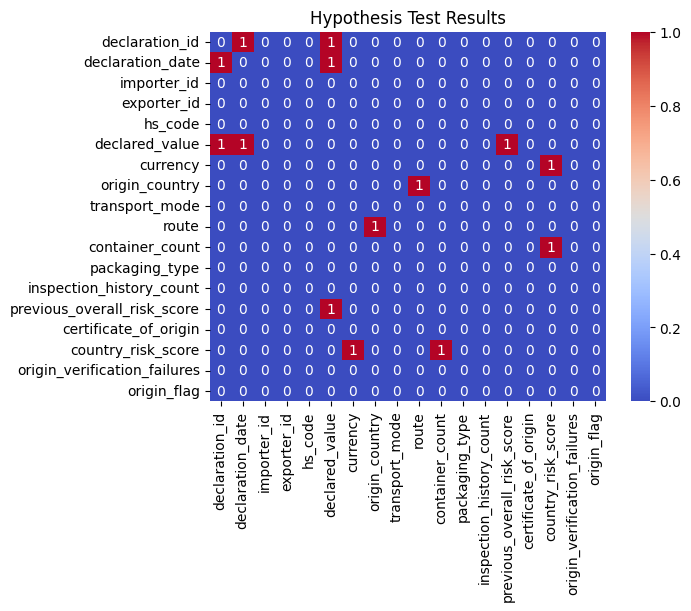

In [ ]:
# Create a heatmap
sns.heatmap(comperativeColumn_result == 'H0 is rejected', annot=True, cmap='coolwarm')
plt.title('Hypothesis Test Results')
plt.show()

In [ ]:
# Assuming comperativeColumn_result is your dictionary for categorical tests
comperativeColumn_result_df = pd.DataFrame(comperativeColumn_result)

# Display
comperativeColumn_result_df


,declaration_id,declaration_date,importer_id,exporter_id,hs_code,declared_value,currency,origin_country,transport_mode,route,container_count,packaging_type,inspection_history_count,previous_overall_risk_score,certificate_of_origin,country_risk_score,origin_verification_failures,origin_flag
declaration_id,,H0 is rejected,,,,H0 is rejected,,,,,,,,,,,,
declaration_date,H0 is rejected,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is rejected,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,,H0 is accepted
importer_id,,H0 is accepted,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,,H0 is accepted
exporter_id,,H0 is accepted,H0 is accepted,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,,H0 is accepted
hs_code,,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,,H0 is accepted
declared_value,H0 is rejected,H0 is rejected,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is rejected,,H0 is accepted,,H0 is accepted
currency,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is rejected,,H0 is accepted
origin_country,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,H0 is rejected,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,,H0 is accepted
transport_mode,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,,H0 is accepted
route,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,H0 is rejected,H0 is accepted,,H0 is accepted,H0 is accepted,H0 is accepted,H0 is accepted,,H0 is accepted,,H0 is accepted


## Data visualization

Univariate and Bivariate Analysis

In [ ]:
file_path = '/content/drive/MyDrive/ML3/Copy of risk_models_training_uae.xlsx'

# Load only the required sheet
df = pd.read_excel(file_path, sheet_name='4_Country_of_origin')

df.head()

,declaration_id,declaration_date,importer_id,exporter_id,hs_code,declared_value,currency,origin_country,transport_mode,route,container_count,packaging_type,inspection_history_count,previous_overall_risk_score,certificate_of_origin,country_risk_score,origin_verification_failures,origin_flag
0,DCL00001,2024-03-29,IMP357,EXP199,29211920,46561.43,CNY,DE,road,DEAE,5,box,3,0.34,NaN,0.06,NaN,0
1,DCL00002,2025-06-05,IMP134,EXP459,85171200,23743.07,USD,CN,road,SGAE,2,loose,0,0.51,NaN,0.57,NaN,0
2,DCL00003,2024-01-03,IMP446,EXP340,71131990,44993.75,SAR,SG,road,INAE,4,box,5,0.27,NaN,0.65,NaN,0
3,DCL00004,2025-04-11,IMP093,EXP092,10061001,33719.88,SAR,SG,sea,USAE,3,bag,3,0.44,NaN,0.90,NaN,0
4,DCL00005,2024-03-15,IMP399,EXP338,93049099,39873.53,EUR,CN,sea,INAE,4,loose,5,0.53,NaN,0.42,NaN,0


In [ ]:
continuous_columns = ["declaration_date","declaration_id","declared_value"]
category_columns = ['importer_id', 'exporter_id', 'hs_code', 'currency', 'origin_country', 'transport_mode', 'route', 'container_count', 'packaging_type', 'inspection_history_count', 'previous_overall_risk_score', 'country_risk_score', 'origin_flag']

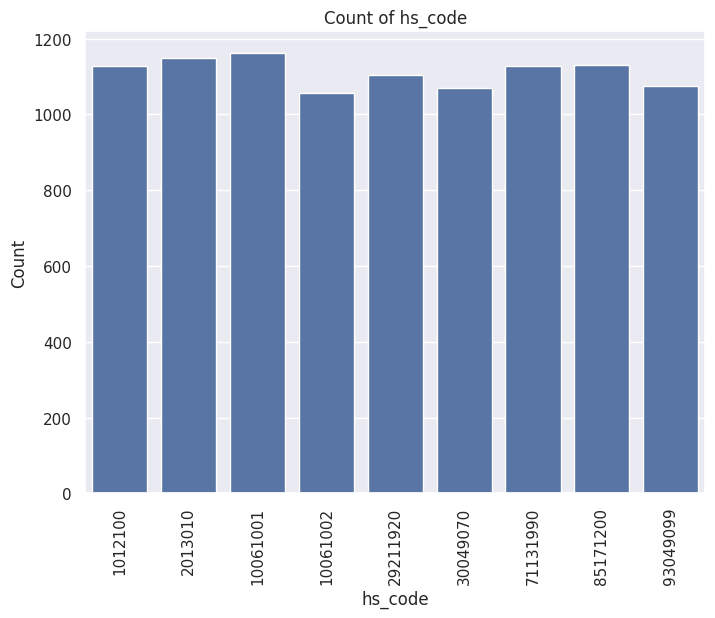

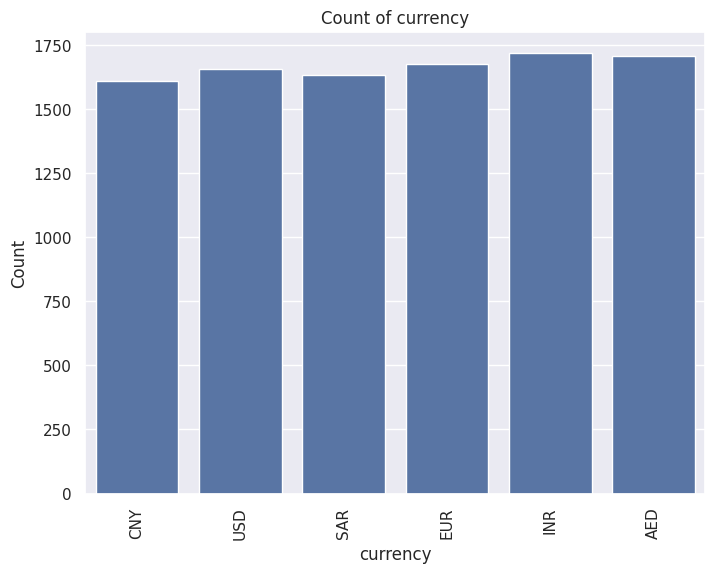

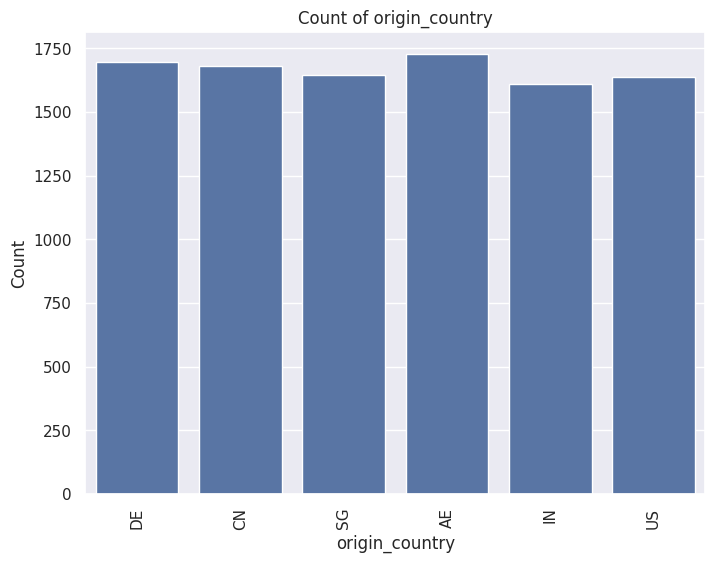

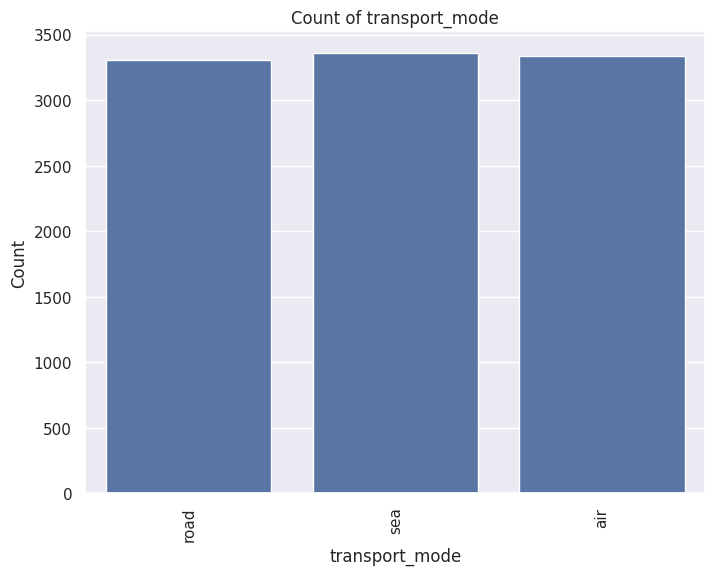

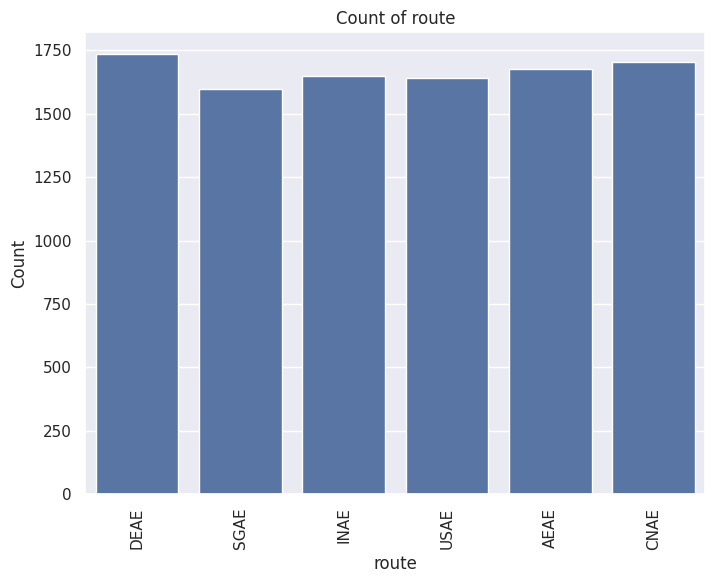

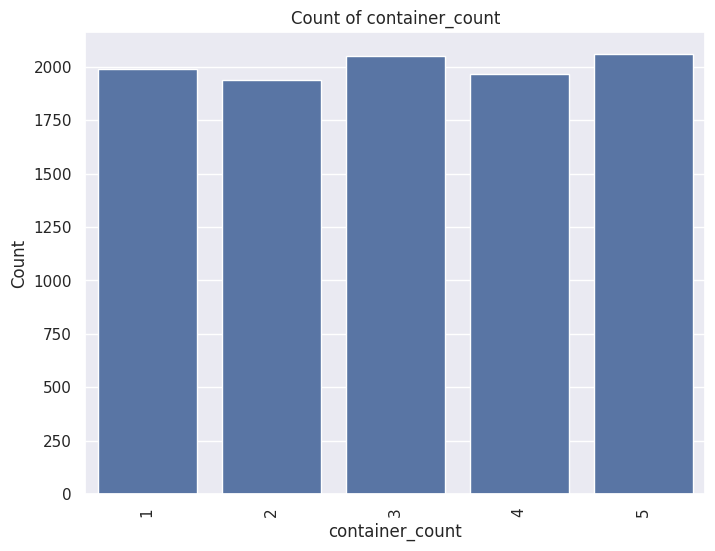

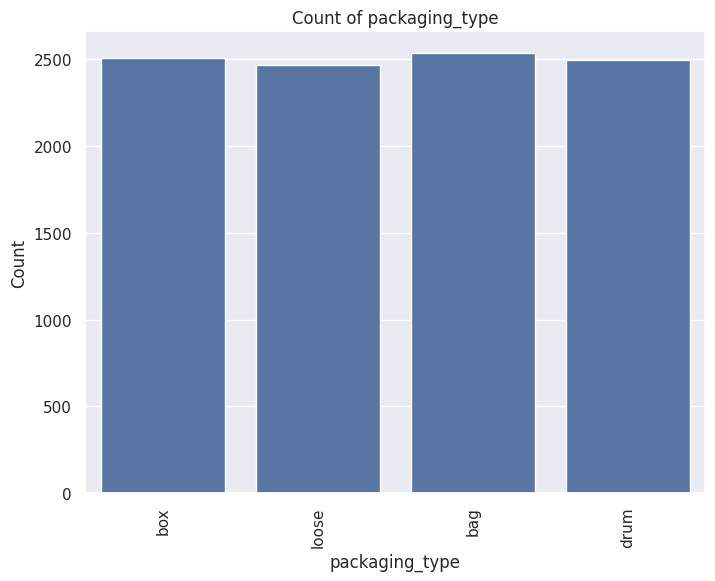

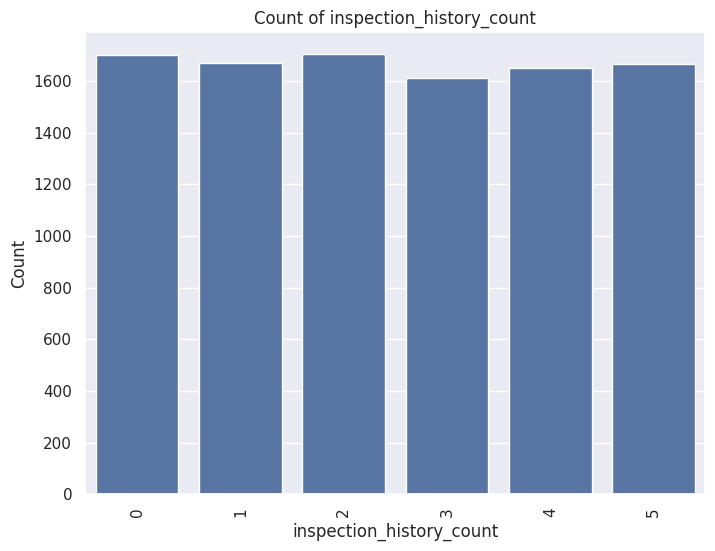

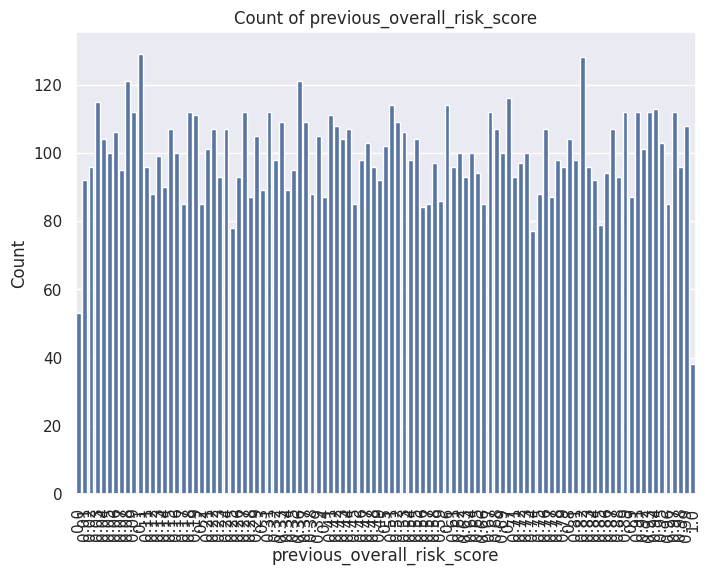

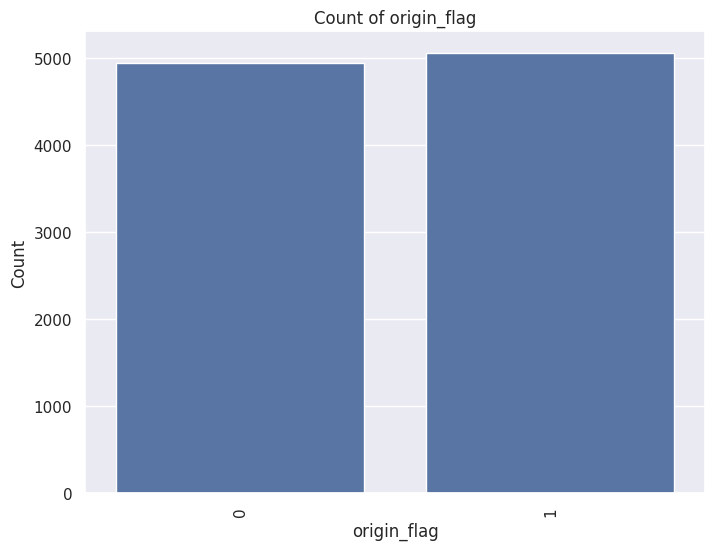

In [ ]:
features = ['hs_code', 'currency', 'origin_country', 'transport_mode', 'route', 'container_count', 'packaging_type', 'inspection_history_count', 'previous_overall_risk_score', 'origin_flag']
# Loop through each feature and create a count plot
for feature in features:
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=90)
    plt.show()

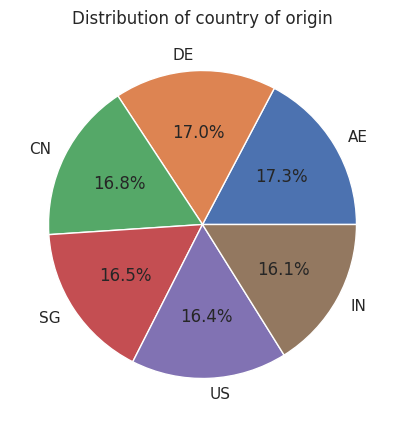

In [ ]:
# Pie chart
plt.figure(figsize=(5, 5))
df['origin_country'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Distribution of country of origin')
plt.ylabel('')
plt.show()

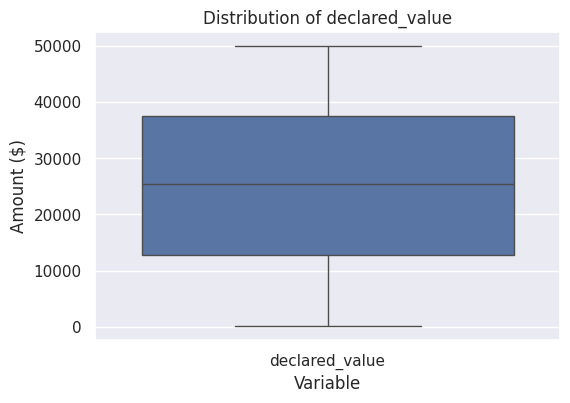

In [ ]:
# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df[["declared_value"]])
plt.title('Distribution of declared_value')
plt.ylabel('Amount ($)')
plt.xlabel('Variable')
plt.show()

In [ ]:
df.head()

,declaration_id,declaration_date,importer_id,exporter_id,hs_code,declared_value,currency,origin_country,transport_mode,route,container_count,packaging_type,inspection_history_count,previous_overall_risk_score,certificate_of_origin,country_risk_score,origin_verification_failures,origin_flag
0,DCL00001,2024-03-29,IMP357,EXP199,29211920,46561.43,CNY,DE,road,DEAE,5,box,3,0.34,NaN,0.06,NaN,0
1,DCL00002,2025-06-05,IMP134,EXP459,85171200,23743.07,USD,CN,road,SGAE,2,loose,0,0.51,NaN,0.57,NaN,0
2,DCL00003,2024-01-03,IMP446,EXP340,71131990,44993.75,SAR,SG,road,INAE,4,box,5,0.27,NaN,0.65,NaN,0
3,DCL00004,2025-04-11,IMP093,EXP092,10061001,33719.88,SAR,SG,sea,USAE,3,bag,3,0.44,NaN,0.90,NaN,0
4,DCL00005,2024-03-15,IMP399,EXP338,93049099,39873.53,EUR,CN,sea,INAE,4,loose,5,0.53,NaN,0.42,NaN,0


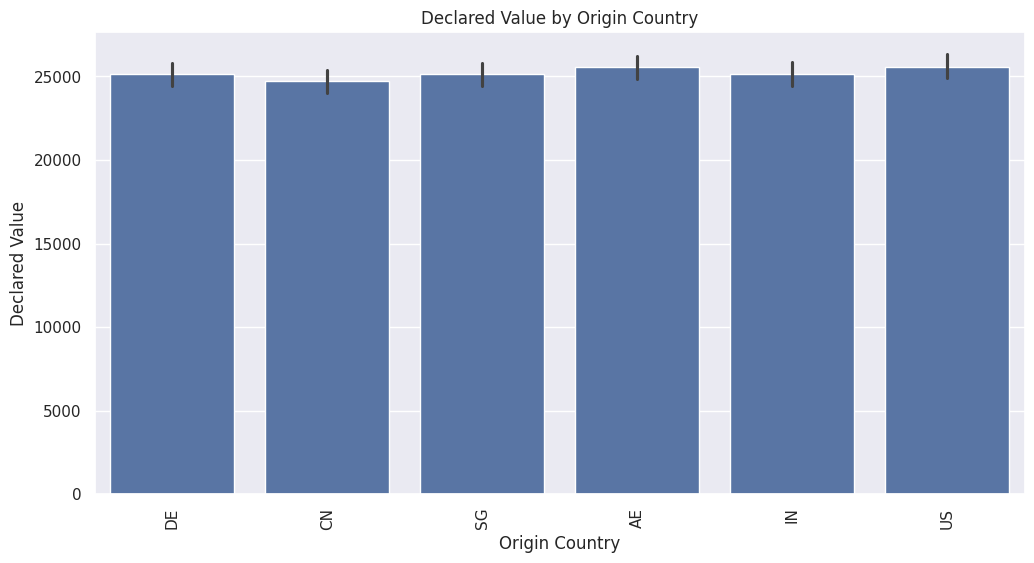

In [ ]:
plt.figure(figsize=(12,6))
sns.barplot(x="origin_country", y="declared_value", data=df)
plt.xticks(rotation=90)   # rotate x labels for readability
plt.title("Declared Value by Origin Country")
plt.xlabel("Origin Country")
plt.ylabel("Declared Value")
plt.show()

In [ ]:
import plotly.express as px

# Aggregate so each country has one bar
agg_df = df.groupby("origin_country", as_index=False)["declared_value"].sum()

# Define your custom color palette
#custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']
custom_colors = [
    "#4E79A7",  # Muted Blue
    "#F28E2B",  # Soft Orange
    "#E15759",  # Muted Red
    "#76B7B2",  # Teal
    "#59A14F",  # Muted Green
    "#EDC948"   # Warm Yellow
]

fig = px.bar(
    agg_df,
    x="origin_country",
    y="declared_value",
    text="declared_value",
    title="Total Declared Value by Origin Country",
    color="origin_country",
    color_discrete_sequence=custom_colors  # use your custom colors
)

# Make bars fully solid and improve layout
fig.update_traces(marker=dict(opacity=1))
fig.update_layout(
    xaxis_title="Origin Country",
    yaxis_title="Total Declared Value",
    xaxis_tickangle=-45,
    plot_bgcolor="white",
    paper_bgcolor="white"
)

fig.show()


# Data Preprocessing

## Data Cleaning

Both certificate_of_origin and origin_verification_failures columns contain only missing values (0 non-null counts). Since they don’t provide any information, we safely drop them from the dataset.

In [ ]:
file_path = '/content/drive/MyDrive/ML3/Copy of risk_models_training_uae.xlsx'

# Load only the required sheet
df = pd.read_excel(file_path, sheet_name='4_Country_of_origin')

df.head()

,declaration_id,declaration_date,importer_id,exporter_id,hs_code,declared_value,currency,origin_country,transport_mode,route,container_count,packaging_type,inspection_history_count,previous_overall_risk_score,certificate_of_origin,country_risk_score,origin_verification_failures,origin_flag
0,DCL00001,2024-03-29,IMP357,EXP199,29211920,46561.43,CNY,DE,road,DEAE,5,box,3,0.34,NaN,0.06,NaN,0
1,DCL00002,2025-06-05,IMP134,EXP459,85171200,23743.07,USD,CN,road,SGAE,2,loose,0,0.51,NaN,0.57,NaN,0
2,DCL00003,2024-01-03,IMP446,EXP340,71131990,44993.75,SAR,SG,road,INAE,4,box,5,0.27,NaN,0.65,NaN,0
3,DCL00004,2025-04-11,IMP093,EXP092,10061001,33719.88,SAR,SG,sea,USAE,3,bag,3,0.44,NaN,0.90,NaN,0
4,DCL00005,2024-03-15,IMP399,EXP338,93049099,39873.53,EUR,CN,sea,INAE,4,loose,5,0.53,NaN,0.42,NaN,0


In [ ]:
df.drop(columns = ['certificate_of_origin','origin_verification_failures'], inplace=True)

declaration_id is just an identifier. Keeping it won’t help in analysis or modeling, since it doesn’t contribute to patterns or relationships in the data.

In [ ]:
df.drop(columns = ['declaration_id','declaration_date','currency'], inplace=True)

In [ ]:
df.head(2)

,importer_id,exporter_id,hs_code,declared_value,origin_country,transport_mode,route,container_count,packaging_type,inspection_history_count,previous_overall_risk_score,country_risk_score,origin_flag
0,IMP357,EXP199,29211920,46561.43,DE,road,DEAE,5,box,3,0.34,0.06,0
1,IMP134,EXP459,85171200,23743.07,CN,road,SGAE,2,loose,0,0.51,0.57,0


## Encoding

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   importer_id     10000 non-null  object
 1   exporter_id     10000 non-null  object
 2   hs_code         10000 non-null  int64 
 3   origin_country  10000 non-null  object
 4   route           10000 non-null  object
 5   origin_flag     10000 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 468.9+ KB


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
import pickle

# Example DataFrame
# df = pd.read_csv("your_data.csv")

# Identify categorical columns
categorical_cols = ['importer_id', 'exporter_id', 'hs_code', 'origin_country',
                    'transport_mode', 'route']

# Ordinal Encoding for categorical features
encoder = OneHotEncoder()
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])

# Save the encoder for later decoding
with open('ordinal_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)



ValueError: Columns must be same length as key

In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import pickle

# Example DataFrame
# df = pd.read_csv("your_data.csv")

# Identify categorical columns
categorical_cols = ['importer_id', 'exporter_id', 'origin_country',
                    'transport_mode', 'route']

# OneHot Encoding for categorical features
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)

# Fit and transform
encoded = encoder.fit_transform(df[categorical_cols])

# Convert encoded array to DataFrame with proper column names
encoded_df = pd.DataFrame(encoded, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and join encoded ones
df_final = pd.concat([df.drop(columns=categorical_cols).reset_index(drop=True),
                      encoded_df.reset_index(drop=True)], axis=1)

# Save the encoder for later use
with open('onehot_encoder.pkl', 'wb') as f:
    pickle.dump(encoder, f)

# ✅ Data is now ML-ready with OneHot encoding
print(df_final.head())


   hs_code  declared_value  origin_flag  importer_id_0.0  importer_id_1.0  \
0     4.00        46561.43            0             0.00             0.00   
1     7.00        23743.07            0             0.00             0.00   
2     6.00        44993.75            0             0.00             0.00   
3     2.00        33719.88            0             0.00             0.00   
4     8.00        39873.53            0             0.00             0.00   

   importer_id_2.0  importer_id_3.0  importer_id_4.0  importer_id_5.0  \
0             0.00             0.00             0.00             0.00   
1             0.00             0.00             0.00             0.00   
2             0.00             0.00             0.00             0.00   
3             0.00             0.00             0.00             0.00   
4             0.00             0.00             0.00             0.00   

   importer_id_6.0  ...  origin_country_5.0  transport_mode_0.0  \
0             0.00  ...        

In [ ]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
import pandas as pd
import pickle

# Example DataFrame
# df = pd.read_csv("your_data.csv")

# Columns
ordinal_cols = ['importer_id', 'exporter_id']   # high-cardinality → Ordinal
onehot_cols  = ['origin_country', 'transport_mode', 'route']  # low-cardinality → OneHot

# Preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ("ord", OrdinalEncoder(), ordinal_cols),
        ("ohe", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_cols)
    ],
    remainder="passthrough"  # keep declared_value and hs_code (if needed)
)

# Fit and transform
df_transformed = preprocessor.fit_transform(df)

# Convert back to DataFrame with proper column names
ohe_feature_names = preprocessor.named_transformers_['ohe'].get_feature_names_out(onehot_cols)
final_cols = ordinal_cols + list(ohe_feature_names) + [col for col in df.columns if col not in ordinal_cols + onehot_cols]
df = pd.DataFrame(df_transformed, columns=final_cols)

# Save encoder
with open('mixed_encoder.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

print(df.head())


   importer_id  exporter_id  origin_country_0.0  origin_country_1.0  \
0       356.00       198.00                0.00                0.00   
1       133.00       458.00                0.00                1.00   
2       445.00       339.00                0.00                0.00   
3        92.00        91.00                0.00                0.00   
4       398.00       337.00                0.00                1.00   

   origin_country_2.0  origin_country_3.0  origin_country_4.0  \
0                1.00                0.00                0.00   
1                0.00                0.00                0.00   
2                0.00                0.00                1.00   
3                0.00                0.00                1.00   
4                0.00                0.00                0.00   

   origin_country_5.0  transport_mode_0.0  transport_mode_1.0  \
0                0.00                0.00                1.00   
1                0.00                0.00           

# Encoding 2

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold, cross_val_score
import numpy as np

# -------------------------------
# Define target variable
# -------------------------------
# y = df['origin_flag']   # make sure this is your target column
y = df['origin_flag']

# -------------------------------
# Model
# -------------------------------
rf = RandomForestClassifier(random_state=42)

# -------------------------------
# Stratified 5-Fold CV
# -------------------------------
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

cv_scores = cross_val_score(rf, df_encoded, y, cv=skf, scoring='accuracy')

print("Cross-validated Accuracy Scores:", cv_scores)
print("Mean CV Accuracy:", np.mean(cv_scores))


Cross-validated Accuracy Scores: [0.502  0.494  0.496  0.4925 0.483 ]
Mean CV Accuracy: 0.49349999999999994


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample

# -------------------------------
# Load dataset
# -------------------------------
# df = pd.read_csv("path_to_dataset.csv")  # Replace with your path

# -------------------------------
# Oversample / increase dataset size
# -------------------------------
df_majority = df[df['origin_flag'] == 0]
df_minority = df[df['origin_flag'] == 1]

df_majority_oversampled = resample(df_majority, replace=True, n_samples=len(df_majority)*13, random_state=42)
df_minority_oversampled = resample(df_minority, replace=True, n_samples=len(df_minority)*3, random_state=42)

df_oversampled = pd.concat([df_majority_oversampled, df_minority_oversampled]).reset_index(drop=True)
print("Oversampled dataset shape:", df_oversampled.shape)
print(df_oversampled['origin_flag'].value_counts())

# -------------------------------
# Custom Frequency Encoder
# -------------------------------
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.freq_map = {}

    def fit(self, X, y=None):
        for col in X.columns:
            freq = X[col].value_counts()
            self.freq_map[col] = freq.to_dict()
        return self

    def transform(self, X):
        X_encoded = X.copy()
        for col in X.columns:
            X_encoded[col] = X[col].map(self.freq_map[col]).fillna(0)
        return X_encoded

# -------------------------------
# Columns definition
# -------------------------------
freq_cols = ["importer_id", "exporter_id",'previous_overall_risk_score','country_risk_score']
onehot_cols = ["origin_country", "transport_mode", "route", 'container_count','hs_code','packaging_type','inspection_history_count']
scale_cols = ["declared_value"]

# -------------------------------
# Column Transformer
# -------------------------------
preprocessor = ColumnTransformer(
    transformers=[
        ("freq", FrequencyEncoder(), freq_cols),
        ("onehot", OneHotEncoder(handle_unknown="ignore", sparse_output=False), onehot_cols),
        ("scale", StandardScaler(), scale_cols),
    ]
)

# -------------------------------
# Pipeline
# -------------------------------
pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# -------------------------------
# Fit + Transform on oversampled dataset
# -------------------------------
X_encoded_values = pipeline.fit_transform(df_oversampled)

# -------------------------------
# Convert to DataFrame
# -------------------------------
ohe = pipeline.named_steps["preprocessor"].named_transformers_["onehot"]
ohe_features = ohe.get_feature_names_out(onehot_cols)

all_features = freq_cols + list(ohe_features) + scale_cols
df_encoded = pd.DataFrame(X_encoded_values, columns=all_features, index=df_oversampled.index)

# -------------------------------
# Add target variable
# -------------------------------
df_encoded['origin_flag'] = df_oversampled['origin_flag'].values

print(df_encoded.head())
print("Encoded dataset shape:", df_encoded.shape)


Oversampled dataset shape: (79420, 13)
origin_flag
0    64246
1    15174
Name: count, dtype: int64
   importer_id  exporter_id  previous_overall_risk_score  country_risk_score  \
0       185.00       124.00                      1133.00              979.00   
1       260.00        93.00                       854.00              773.00   
2       170.00       137.00                       927.00              809.00   
3       203.00       173.00                       858.00              756.00   
4       135.00       168.00                       916.00             1065.00   

   origin_country_AE  origin_country_CN  origin_country_DE  origin_country_IN  \
0               0.00               1.00               0.00               0.00   
1               0.00               0.00               0.00               0.00   
2               1.00               0.00               0.00               0.00   
3               0.00               1.00               0.00               0.00   
4              

In [ ]:
from sklearn.utils import resample

df_majority = df[df['origin_flag'] == 0]
df_minority = df[df['origin_flag'] == 1]

print("Majority class rows:", len(df_majority))
print("Minority class rows:", len(df_minority))

# Oversample only if class is not empty
if len(df_majority) > 0:
    df_majority_oversampled = resample(df_majority, replace=True, n_samples=len(df_majority)*13, random_state=42)
else:
    df_majority_oversampled = pd.DataFrame()

if len(df_minority) > 0:
    df_minority_oversampled = resample(df_minority, replace=True, n_samples=len(df_minority)*3, random_state=42)
else:
    df_minority_oversampled = pd.DataFrame()

# Combine back
df_oversampled = pd.concat([df_majority_oversampled, df_minority_oversampled]).reset_index(drop=True)
print("Oversampled dataset shape:", df_oversampled.shape)
print(df_oversampled['origin_flag'].value_counts())


Majority class rows: 4942
Minority class rows: 5058
Oversampled dataset shape: (79420, 13)
origin_flag
0    64246
1    15174
Name: count, dtype: int64


## Feature Engineering

# Machine Learning

1 data availability

2 separating independent and dependent

3 identifying algorithms/Model

4 training

5 evaluation

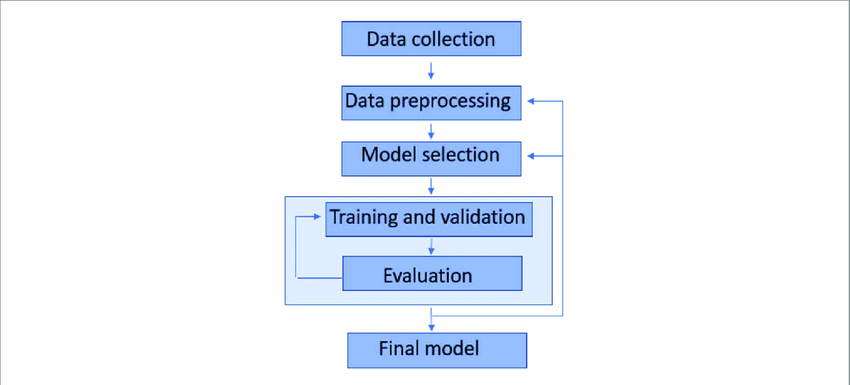

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   importer_id         10000 non-null  float64
 1   exporter_id         10000 non-null  float64
 2   origin_country_0.0  10000 non-null  float64
 3   origin_country_1.0  10000 non-null  float64
 4   origin_country_2.0  10000 non-null  float64
 5   origin_country_3.0  10000 non-null  float64
 6   origin_country_4.0  10000 non-null  float64
 7   origin_country_5.0  10000 non-null  float64
 8   transport_mode_0.0  10000 non-null  float64
 9   transport_mode_1.0  10000 non-null  float64
 10  transport_mode_2.0  10000 non-null  float64
 11  route_0.0           10000 non-null  float64
 12  route_1.0           10000 non-null  float64
 13  route_2.0           10000 non-null  float64
 14  route_3.0           10000 non-null  float64
 15  route_4.0           10000 non-null  float64
 16  route

In [ ]:
from sklearn.model_selection import train_test_split
x=df_encoded.drop("origin_flag",axis=1)
y=df_encoded["origin_flag"]

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [ ]:
# Classification
reg = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(x_train, x_test, y_train, y_test)
print(models)

  0%|          | 0/32 [00:00<?, ?it/s]

CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X).
FixedThresholdClassifier model failed to execute
FixedThresholdClassifier.__init__() missing 1 required positional argument: 'estimator'


In [ ]:
from sklearn.metrics import accuracy_score

class Classification_models:
    def __init__(self, x_train, x_test, y_train, y_test):
        self.x_train = x_train
        self.x_test = x_test
        self.y_train = y_train
        self.y_test = y_test

    def decisiontree(self):
        from sklearn.tree import DecisionTreeClassifier
        model = DecisionTreeClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        return train_accuracy, test_accuracy

    def random_forest_classifier(self):
        from sklearn.ensemble import RandomForestClassifier
        model = RandomForestClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        return train_accuracy, test_accuracy

    def gradient_boosting(self):
        from sklearn.ensemble import GradientBoostingClassifier
        model = GradientBoostingClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        return train_accuracy, test_accuracy

    def adaboost(self):
        from sklearn.ensemble import AdaBoostClassifier
        model = AdaBoostClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        return train_accuracy, test_accuracy

    def extra_trees_classifier(self):
        from sklearn.ensemble import ExtraTreesClassifier
        model = ExtraTreesClassifier().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        return train_accuracy, test_accuracy


    def support_vector_machine(self):
        from sklearn.svm import SVC
        model = SVC().fit(self.x_train, self.y_train)
        y_train_pred = model.predict(self.x_train)
        y_test_pred = model.predict(self.x_test)
        train_accuracy = accuracy_score(self.y_train, y_train_pred)
        test_accuracy = accuracy_score(self.y_test, y_test_pred)
        return train_accuracy, test_accuracy



In [ ]:
model = Classification_models(x_train, x_test, y_train, y_test)

accuracy_scores = {
    'DecisionTree': model.decisiontree(),
    'RandomForest': model.random_forest_classifier(),
    'GradientBoosting': model.gradient_boosting(),
    'AdaBoost': model.adaboost(),
    'ExtraTreesClassifier': model.extra_trees_classifier(),
    'SVM': model.support_vector_machine()
}

# for classifier, (train_score, test_score) in accuracy_scores.items():
#     print(f"\n{classifier} train accuracy score: {train_score:.4f}")
#     print(f"{classifier} test accuracy score: {test_score:.4f}")

In [ ]:
# Convert to DataFrame for a clean table
accuracy_df = pd.DataFrame(accuracy_scores, index=['Train Accuracy', 'Test Accuracy']).T
accuracy_df = accuracy_df.round(4)  # optional, 4 decimal places

print(accuracy_df)

                      Train Accuracy  Test Accuracy
DecisionTree                    1.00           0.99
RandomForest                    1.00           0.99
GradientBoosting                0.81           0.81
AdaBoost                        0.81           0.81
ExtraTreesClassifier            1.00           0.99
SVM                             0.81           0.81


In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# -------------------------------
# Split features and target
# -------------------------------
X = df_encoded.drop(columns=['origin_flag'])
y = df_encoded['origin_flag']

# -------------------------------
# Define parameter grid
# -------------------------------
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'linear', 'poly'],
    'gamma': ['scale', 'auto'],
    'degree': [2, 3, 4]  # only used for 'poly' kernel
}

# -------------------------------
# Stratified 5-Fold CV
# -------------------------------
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# -------------------------------
# Grid Search
# -------------------------------
svm = SVC()
grid_search = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    scoring='accuracy',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# -------------------------------
# Fit Grid Search
# -------------------------------
grid_search.fit(X, y)

# -------------------------------
# Best parameters and accuracy
# -------------------------------
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# -------------------------------
# Evaluate on full dataset (optional)
# -------------------------------
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X)

print("Accuracy on full dataset:", accuracy_score(y, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("Classification Report:\n", classification_report(y, y_pred))


Fitting 5 folds for each of 72 candidates, totalling 360 fits


KeyboardInterrupt: 

## Evaluation

In [ ]:
from sklearn.metrics import top_k_accuracy_score, precision_score, recall_score

In [ ]:
kas = top_k_accuracy_score(y_test, y_pred_test, k=1)
ps = precision_score(y_test, y_pred_test)
rs = recall_score(y_test, y_pred_test)

kas, ps, rs

(np.float64(0.489), 0.5033881897386253, 0.5053449951409135)

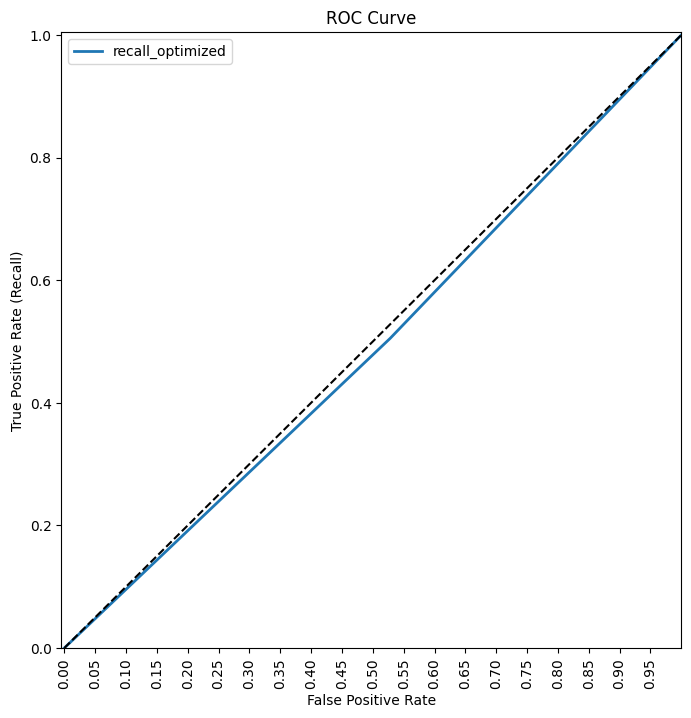

In [ ]:
# ROC curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

def plot_roc_curve(fpr, tpr, label=None):
    """
    The ROC curve, modified from
    Hands-On Machine learning with Scikit-Learn and TensorFlow; p.91
    """
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.legend(loc='best')

#make roc auc curve
fpr, tpr, auc_thresholds = roc_curve(y_test, y_pred_test)
# print('ROC AUC Score: ',str(round(auc(fpr, tpr)*100,1)), '%') # AUC of ROC
plot_roc_curve(fpr, tpr, 'recall_optimized')

In [ ]:
# 2️⃣ Decode example (reverse transform)
# Load encoder from pickle
with open('ordinal_encoder.pkl', 'rb') as f:
    loaded_encoder = pickle.load(f)

# Decode categorical columns back to original values
decoded_cats = loaded_encoder.inverse_transform(df[categorical_cols])
decoded_df = pd.DataFrame(decoded_cats, columns=categorical_cols)
print(decoded_df.head())

In [ ]:
import pandas as pd
import pickle

# Path to your saved encoder in Google Drive
encoder_path = '/content/drive/MyDrive/ML3/ordinal_encoder.pkl'

# Load the encoder
with open(encoder_path, 'rb') as f:
    loaded_encoder = pickle.load(f)

# Decode categorical columns back to original values
categorical_cols = ['importer_id', 'exporter_id', 'currency', 'origin_country',
                    'transport_mode', 'route', 'packaging_type']

decoded_cats = loaded_encoder.inverse_transform(df[categorical_cols])
decoded_df = pd.DataFrame(decoded_cats, columns=categorical_cols)

print(decoded_df.head())
